In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X.shape

(150, 2)

Text(0.5, 1.0, 'Random Classification data with 2 classes')

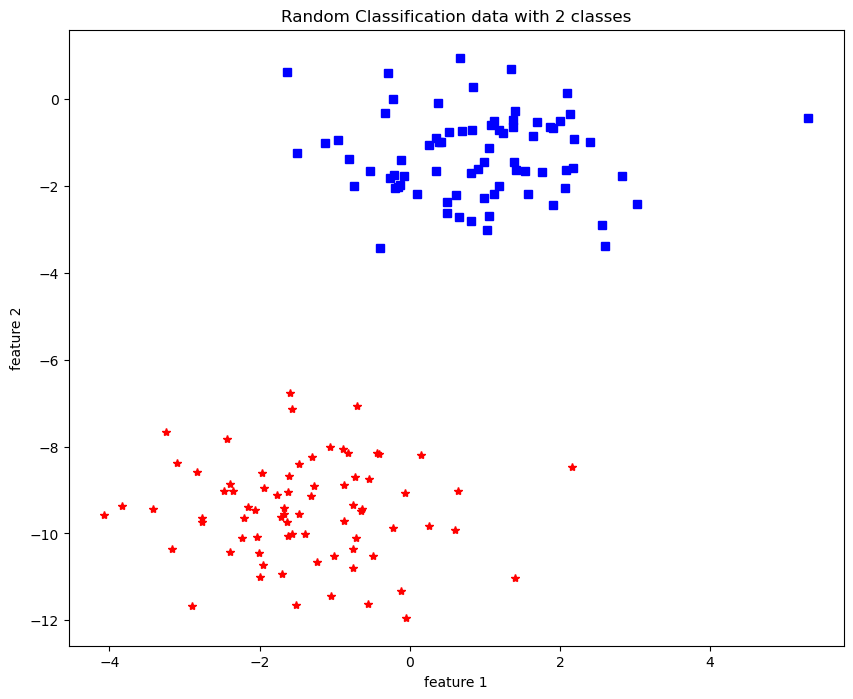

In [2]:
# Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0], X[:,1][y==0], 'r*')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification data with 2 classes')

In [3]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs,
    # y --> labels/target,
    # lr --> learning rate,
    # epochs --> no. of iterations.
    
    m, n = X.shape
    # m --> no. of training examples
    # n --> no. of features
    
    # Initializing parameters(theta) to zeros,
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1, 1))
    
    # Empty list to store how many examples were misclassified at every iteration.
    n_miss_list = []
    
    # Training
    for epoch in range(epochs):
        n_miss = 0
        
        # Looping for every example
        for idx, x_i in enumerate(X):
            # Inserting 1 for bias, X0=1
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            # Calculating prediction/hypothesis
            y_hat = step_func(np.dot(x_i.T, theta))
            # Updating if the example is misclassified
            if (np.squeeze(y_hat)-y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                # Incrementing by 1
                n_miss += 1
        
        #Appending no. of misclassified examples at every iteration
        n_miss_list.append(n_miss)
    
    return theta, n_miss_list

In [4]:
def step_func(z):
    return 1.0 if (z>0) else 0.0

In [5]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The line is y=mx+c
    # So, equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1] / theta[2]
    c = -theta[0] / theta[2]
    x2 = m*x1 + c
    
    #Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'r^')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Prerceptron Algorithm")
    plt.plot(x1, x2, 'y-')

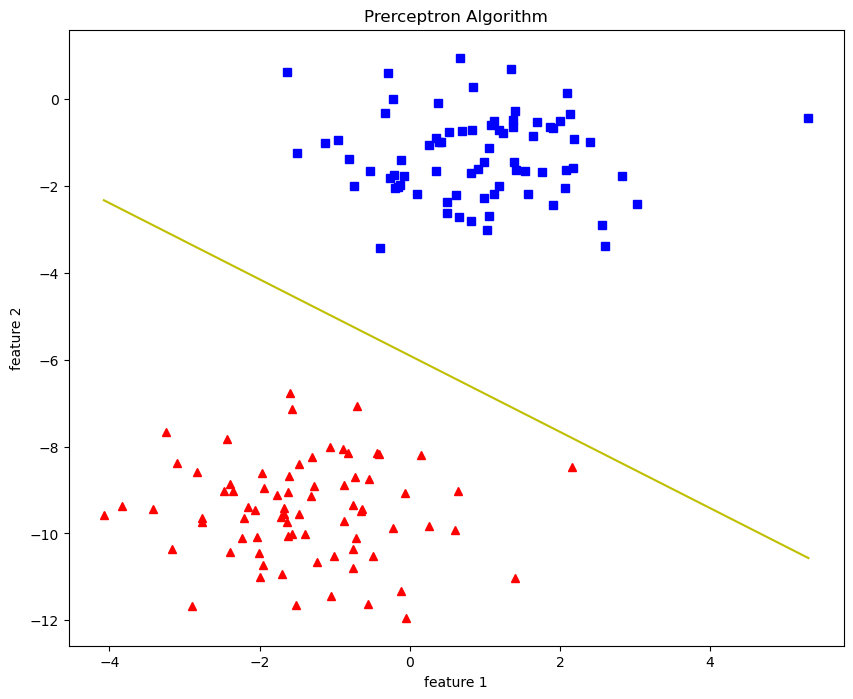

In [6]:
theta, miss_1 = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [8]:
print(X)

[[-5.32783010e-01 -1.64847081e+00]
 [-5.50226372e-01 -1.16166152e+01]
 [ 1.38862276e+00 -1.43580590e+00]
 [ 1.37033956e+00 -6.40220712e-01]
 [-8.80606388e-01 -9.70946740e+00]
 [-2.22746033e+00 -1.01019963e+01]
 [-3.83660791e+00 -9.36311253e+00]
 [-2.61500332e-01 -1.80587922e+00]
 [ 1.18267985e+00 -7.12729660e-01]
 [-8.91135194e-01 -8.05385981e+00]
 [-3.42244116e+00 -9.43290706e+00]
 [-3.24159714e+00 -7.66373146e+00]
 [-8.14411765e-02 -1.76413571e+00]
 [ 2.82215236e+00 -1.76342807e+00]
 [ 1.90632766e+00 -2.43499725e+00]
 [ 1.12041042e+00 -2.18272234e+00]
 [ 4.12652646e-01 -9.79048994e-01]
 [-1.61986103e+00 -9.03645942e+00]
 [ 1.24676117e+00 -7.71255216e-01]
 [-2.01362140e+00 -1.04568119e+01]
 [-6.48510353e-01 -9.47763290e+00]
 [ 1.90763236e+00 -6.71105011e-01]
 [-7.57264801e-01 -9.34864598e+00]
 [ 2.18263294e+00 -9.04732063e-01]
 [ 1.53216357e+00 -1.64513848e+00]
 [ 1.12431439e+00 -4.99224897e-01]
 [ 1.19440189e+00 -1.98887161e+00]
 [-2.43377785e+00 -7.81776395e+00]
 [ 3.50550070e-01 -1

In [9]:
print(y)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]
